# data loading

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_master_test.csv")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_master_train.csv")

In [ ]:
regist = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_regist.csv")

In [ ]:
rent = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_rent.csv")

In [ ]:
result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_result.csv")

In [ ]:
train

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,40.55,84.87,84.87,401000000,401000000,2017-06-19 00:00:00,2017-06-19 00:00:00,낙찰,Private,서울,도봉구,창동,NaN,N,45.0,NaN,삼성 110동 15층 1501호,아파트,1992-08-29 00:00:00,21,15,NaN,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648810,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,39.60,114.81,114.81,454000000,363200000,2017-02-13 00:00:00,2017-03-13 00:00:00,낙찰,중소기업은행,서울,노원구,상계동,NaN,N,1289.0,NaN,상계불암대림 205동 23층 2303호,아파트,2000-05-30 00:00:00,23,23,NaN,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,19.03,133.98,133.98,1285000000,1028000000,2017-12-21 00:00:00,2018-01-18 00:00:00,낙찰,우리은행,서울,중구,회현동1가,NaN,N,208.0,NaN,",회현동2가 89 남산롯데캐슬아이리스 19층 102-1905호",주상복합,2011-12-13 00:00:00,32,19,NaN,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,42.20,84.94,84.94,407000000,325600000,2016-10-10 00:00:00,2016-11-14 00:00:00,낙찰,Private,서울,도봉구,쌍문동,NaN,N,725.0,NaN,삼성래미안 110동 11층 1102호,아파트,2002-11-07 00:00:00,15,11,NaN,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


In [ ]:
from xgboost import XGBRegressor # 회귀 트리 모델
from xgboost import plot_importance # 중요변수 시각화

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
col_names = train.columns
col_names

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [ ]:
train.shape #(1933, 40)

(1933, 41)

In [ ]:
train.Hammer_price# 수치 데이터 -> 회귀

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [ ]:
test_x = test.drop(['Hammer_price'],axis=1)

# object -> int 변형

In [ ]:
train.dtypes

Auction_key                      int64
Auction_class                   object
Bid_class                       object
Claim_price                      int64
Appraisal_company               object
Appraisal_date                  object
Auction_count                    int64
Auction_miscarriage_count        int64
Total_land_gross_area          float64
Total_land_real_area           float64
Total_land_auction_area        float64
Total_building_area            float64
Total_building_auction_area    float64
Total_appraisal_price            int64
Minimum_sales_price              int64
First_auction_date              object
Final_auction_date              object
Final_result                    object
Creditor                        object
addr_do                         object
addr_si                         object
addr_dong                       object
addr_li                         object
addr_san                        object
addr_bunji1                    float64
addr_bunji2              

In [ ]:
factor_col = train.select_dtypes(include='object').columns
factor_col

Index(['Auction_class', 'Bid_class', 'Appraisal_company', 'Appraisal_date',
       'First_auction_date', 'Final_auction_date', 'Final_result', 'Creditor',
       'addr_do', 'addr_si', 'addr_dong', 'addr_li', 'addr_san', 'addr_etc',
       'Apartment_usage', 'Preserve_regist_date', 'Specific',
       'Share_auction_YorN', 'road_name', 'Close_date', 'Close_result'],
      dtype='object')

In [ ]:
num_col = train.columns.difference(factor_col)
num_col

Index(['Auction_count', 'Auction_key', 'Auction_miscarriage_count',
       'Claim_price', 'Current_floor', 'Hammer_price', 'Minimum_sales_price',
       'Total_appraisal_price', 'Total_building_area',
       'Total_building_auction_area', 'Total_floor', 'Total_land_auction_area',
       'Total_land_gross_area', 'Total_land_real_area', 'addr_bunji1',
       'addr_bunji2', 'point.x', 'point.y', 'road_bunji1', 'road_bunji2'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
fac_le = LabelEncoder()

In [ ]:
print(train.Auction_class.unique())
print(train.Bid_class.unique())
# print(train.Appraisal_company.nunique())
print(train.Apartment_usage.unique())
# print(train.Specific.nunique())
print(train.Share_auction_YorN.unique())
print(train.Close_result.value_counts())
# ['Appraisal_date','First_auction_date','Final_auction_date','Preserve_regist_date','Close_date']

['임의' '강제']
['개별' '일반' '일괄']
['주상복합' '아파트']
['N' 'Y']
배당      1921
          12
Name: Close_result, dtype: int64


In [ ]:
label = ['Auction_class','Bid_class','Apartment_usage','Share_auction_YorN','Close_result','Final_result','addr_do','addr_san']

In [ ]:
train[label] = train[label].apply(lambda x: fac_le.fit_transform(x))
test_x[label] = test_x[label].apply(lambda x: fac_le.fit_transform(x))

In [ ]:
factor_col = factor_col.difference(label)
print(factor_col)
num_col = train.columns.difference(factor_col)
print(num_col)

Index(['Appraisal_company', 'Appraisal_date', 'Close_date', 'Creditor',
       'Final_auction_date', 'First_auction_date', 'Preserve_regist_date',
       'Specific', 'addr_dong', 'addr_etc', 'addr_li', 'addr_si', 'road_name'],
      dtype='object')
Index(['Apartment_usage', 'Auction_class', 'Auction_count', 'Auction_key',
       'Auction_miscarriage_count', 'Bid_class', 'Claim_price', 'Close_result',
       'Current_floor', 'Final_result', 'Hammer_price', 'Minimum_sales_price',
       'Share_auction_YorN', 'Total_appraisal_price', 'Total_building_area',
       'Total_building_auction_area', 'Total_floor', 'Total_land_auction_area',
       'Total_land_gross_area', 'Total_land_real_area', 'addr_bunji1',
       'addr_bunji2', 'addr_do', 'addr_san', 'point.x', 'point.y',
       'road_bunji1', 'road_bunji2'],
      dtype='object')


In [ ]:
# a = (train['Appraisal_company'].value_counts()>30)
a = train['Appraisal_company'].value_counts()
company1 = a[:3].index # >30
# a = (train['Appraisal_company'].value_counts()>20)
company2 = a[3:14].index #>20
# a = (train['Appraisal_company'].value_counts()>10)
company3 = a[14:].index # >10
a['삼일감정']

26

In [ ]:
def transfrom_train(app_company, company1, company2, company3,name):
  for i, string_val in enumerate(app_company):
    flag = 1
    for company in company1:
      if string_val == company:
        train.loc[i,name] = 0
        flag = 0
        break
    for company in company2:
      if string_val == company:
        train.loc[i,name] = 1
        flag = 0
        break
    for company in company3:
      if string_val == company:
        train.loc[i,name] = 2
        flag = 0
        break
    if flag == 1:
      flag = 0
      train.loc[i,name] = 3


def transfrom_test_x(app_company, company1, company2, company3,name):
  for i, string_val in enumerate(app_company):
    flag = 1
    for company in company1:
      if string_val == company:
        test_x.loc[i,name] = 0
        flag = 0
        break
    for company in company2:
      if string_val == company:
        test_x.loc[i,name] = 1
        flag = 0
        break
    for company in company3:
      if string_val == company:
        test_x.loc[i,name] = 2
        flag = 0
        break
    if flag == 1:
      flag = 0
      test_x.loc[i,name] = 3

In [ ]:
transfrom_train(train['Appraisal_company'],company1, company2,company3,'Appraisal_company')
train['Appraisal_company'].value_counts()

2    1556
1     280
0      97
Name: Appraisal_company, dtype: int64

In [ ]:
transfrom_test_x(test_x['Appraisal_company'],company1, company2,company3,'Appraisal_company')
test_x['Appraisal_company'].value_counts()

2    676
1    113
0     30
3     10
Name: Appraisal_company, dtype: int64

In [ ]:
factor_col = factor_col.difference(['Appraisal_company'])
print(factor_col)
num_col = train.columns.difference(factor_col)
print(num_col)

Index(['Appraisal_date', 'Close_date', 'Creditor', 'Final_auction_date',
       'First_auction_date', 'Preserve_regist_date', 'Specific', 'addr_dong',
       'addr_etc', 'addr_li', 'addr_si', 'road_name'],
      dtype='object')
Index(['Apartment_usage', 'Appraisal_company', 'Auction_class',
       'Auction_count', 'Auction_key', 'Auction_miscarriage_count',
       'Bid_class', 'Claim_price', 'Close_result', 'Current_floor',
       'Final_result', 'Hammer_price', 'Minimum_sales_price',
       'Share_auction_YorN', 'Total_appraisal_price', 'Total_building_area',
       'Total_building_auction_area', 'Total_floor', 'Total_land_auction_area',
       'Total_land_gross_area', 'Total_land_real_area', 'addr_bunji1',
       'addr_bunji2', 'addr_do', 'addr_san', 'point.x', 'point.y',
       'road_bunji1', 'road_bunji2'],
      dtype='object')


In [ ]:
len(train)

1933

In [ ]:
(train.Creditor.value_counts()>30).sum()

10

In [ ]:
a = train.Creditor.value_counts()
Creditor1 = a[:4].index
Creditor2 = a[4:10].index
Creditor3 = a[10:].index

In [ ]:
transfrom_train(train['Creditor'],Creditor1, Creditor2,Creditor3,'Creditor')
transfrom_test_x(test_x['Creditor'],Creditor1, Creditor2,Creditor3,'Creditor')

test_x.Creditor.value_counts()

0    316
2    243
3    135
1    135
Name: Creditor, dtype: int64

In [ ]:
factor_col = factor_col.difference(['Creditor'])
print(factor_col)
num_col = train.columns.difference(factor_col)
# print(num_col)

Index(['Appraisal_date', 'Close_date', 'Final_auction_date',
       'First_auction_date', 'Preserve_regist_date', 'Specific', 'addr_dong',
       'addr_etc', 'addr_li', 'addr_si', 'road_name'],
      dtype='object')


In [ ]:
location = ['addr_dong', 'addr_etc', 'addr_li', 'addr_san', 'addr_si', 'road_name']
a = (train['addr_dong'].value_counts())

In [ ]:
dong1 = a[:18].index
dong2 = a[18:69].index
dong3 = a[69:].index

In [ ]:
a.index

Index(['상계동', '아현동', '서초동', '신정동', '화곡동', '중계동', '재송동', '창동', '구로동', '용호동',
       ...
       '서대신동2가', '범전동', '토성동5가', '대흥동', '장위동', '중림동', '내수동', '일광면', '홍익동',
       '봉래동4가'],
      dtype='object', length=285)

In [ ]:
transfrom_train(train['addr_dong'],dong1, dong2,dong3,'addr_dong')
transfrom_test_x(test_x['addr_dong'],dong1, dong2,dong3,'addr_dong')

test_x.addr_dong.value_counts()

2    361
1    273
0    164
3     31
Name: addr_dong, dtype: int64

In [ ]:
factor_col = factor_col.difference(['addr_dong'])
print(factor_col)
num_col = train.columns.difference(factor_col)
# print(num_col)

Index(['Appraisal_date', 'Close_date', 'Final_auction_date',
       'First_auction_date', 'Preserve_regist_date', 'Specific', 'addr_etc',
       'addr_li', 'addr_si', 'road_name'],
      dtype='object')


In [ ]:
a = train['addr_si'].value_counts()

In [ ]:
a

노원구     129
강남구     102
사하구      96
해운대구     89
부산진구     84
강서구      78
서초구      73
마포구      71
양천구      68
도봉구      68
송파구      60
사상구      58
구로구      57
남구       56
은평구      53
동대문구     53
북구       53
동래구      51
영등포구     47
성북구      45
관악구      43
강동구      39
동작구      37
중랑구      37
서대문구     37
수영구      33
연제구      31
중구       30
성동구      29
금정구      29
영도구      29
용산구      27
금천구      25
기장군      23
광진구      23
강북구      21
서구       17
종로구      17
동구       15
Name: addr_si, dtype: int64

In [ ]:
b = test['addr_si'].value_counts()

In [ ]:
b

노원구     51
사하구     41
강서구     39
강남구     37
부산진구    33
강동구     31
북구      31
해운대구    28
구로구     27
양천구     25
마포구     24
동래구     24
송파구     24
남구      23
도봉구     23
중랑구     22
서초구     22
사상구     22
영도구     21
은평구     21
성북구     21
영등포구    21
동작구     21
광진구     20
용산구     19
동대문구    18
서대문구    17
연제구     16
금정구     15
성동구     15
관악구     14
중구      13
강북구     13
기장군     11
수영구      8
금천구      8
서구       7
동구       3
Name: addr_si, dtype: int64

In [ ]:
a = train['addr_si'].value_counts()
(a.values>40).sum()
si1 = a[:10].index
si2 = a[10:21].index
si3 = a[21:].index
transfrom_train(train['addr_si'],si1, si2,si3,'addr_si')
transfrom_test_x(test_x['addr_si'],si1, si1,si1,'addr_si')

test_x.addr_si.value_counts()

3    506
2    323
Name: addr_si, dtype: int64

In [ ]:
factor_col = factor_col.difference(['addr_si'])
print(factor_col)
num_col = train.columns.difference(factor_col)
# print(num_col)

Index(['Appraisal_date', 'Close_date', 'Final_auction_date',
       'First_auction_date', 'Preserve_regist_date', 'Specific', 'addr_etc',
       'addr_li', 'road_name'],
      dtype='object')


In [ ]:
drop_le = ['Specific',	'addr_etc',	'addr_li',	'addr_san',	'road_name']
train = train.drop(drop_le,axis = 1)
test_x = test_x.drop(drop_le,axis=1)

In [ ]:
factor_col = factor_col.difference(drop_le)

In [ ]:
train['Auction_Days']=(pd.to_datetime(train['Final_auction_date'],errors='coerce') - pd.to_datetime(train['First_auction_date'],errors='coerce')).dt.days
test_x['Auction_Days']=(pd.to_datetime(test_x['Final_auction_date'],errors='coerce') - pd.to_datetime(test_x['First_auction_date'],errors='coerce')).dt.days

train = train.drop(['Final_auction_date','First_auction_date'],axis=1)
test_x = test_x.drop(['Final_auction_date','First_auction_date'],axis=1)

train['Auction_Days']

0        35
1        35
2        77
3       105
4        28
       ... 
1928      0
1929     28
1930     28
1931     35
1932     35
Name: Auction_Days, Length: 1933, dtype: int64

In [ ]:
train['Preserve_regist_date']=pd.to_datetime(train.Preserve_regist_date,errors='coerce').dt.year
test_x['Preserve_regist_date']=pd.to_datetime(test_x.Preserve_regist_date,errors='coerce').dt.year

In [ ]:
factor_col = train.select_dtypes(include='object').columns
factor_col

Index(['Appraisal_company', 'Appraisal_date', 'Creditor', 'addr_si',
       'addr_dong', 'Close_date'],
      dtype='object')

In [ ]:
# ['Appraisal_date','Close_date']

In [ ]:
train = train.drop(['Appraisal_date','Close_date'],axis=1)
test_x = test_x.drop(['Appraisal_date','Close_date'],axis=1)

In [ ]:
label = train.select_dtypes(include='object').columns

In [ ]:
test_x

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_bunji1,addr_bunji2,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_bunji1,road_bunji2,Close_result,point.y,point.x,Auction_Days
0,1778,0,0,1087000000,1,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,0,0,0,3,1,236.0,NaN,1,NaN,15,5,0,NaN,NaN,1,35.201112,129.088687,1058
1,1779,0,0,1087000000,1,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,0,0,0,3,1,236.0,NaN,1,NaN,15,6,0,NaN,NaN,1,35.201112,129.088687,1030
2,1784,0,0,1087000000,1,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,0,0,0,3,1,236.0,NaN,1,NaN,15,8,0,NaN,NaN,1,35.201112,129.088687,1058
3,1786,0,0,1087000000,1,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,0,0,0,3,1,236.0,NaN,1,NaN,15,9,0,NaN,NaN,1,35.201112,129.088687,1058
4,1790,0,0,1087000000,1,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,0,0,0,3,1,236.0,NaN,1,NaN,15,11,0,NaN,NaN,1,35.201112,129.088687,1058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,1762,0,0,4249164200,2,2,1,3460.9,13.87,13.87,84.91,84.91,420000000,336000000,0,3,1,3,2,229.0,NaN,1,2011.0,23,23,0,284.0,NaN,1,37.605407,127.027309,29
825,1767,0,2,320000000,1,2,1,13578.9,72.81,72.81,150.66,150.66,580000000,464000000,0,1,1,2,0,689.0,NaN,0,2005.0,14,3,0,120.0,NaN,1,37.663305,127.039551,35
826,1770,0,2,160000000,2,2,1,57491.8,34.03,34.03,49.77,49.77,293000000,234400000,0,0,1,3,2,650.0,NaN,0,1996.0,12,5,0,42.0,NaN,1,37.614529,127.091109,28
827,1772,1,2,230000000,2,1,0,27710.2,42.54,42.54,84.84,84.84,492000000,492000000,0,0,1,3,2,317.0,NaN,0,2009.0,17,16,0,27.0,NaN,1,37.620359,127.047071,0


In [ ]:
train[label] = train[label].astype(str).astype(int)
test_x[label] = test_x[label].astype(str).astype(int)

In [ ]:
train_y = train.Hammer_price
train_x = train.drop(['Hammer_price','Auction_key'],axis=1)

# train_validation split

In [ ]:
(train_x,val_x,train_y,val_y) = train_test_split(train_x,train_y,test_size=0.3)

In [ ]:
train_x.shape

(1353, 31)

In [ ]:
val_x.shape

(580, 31)

# XGB

In [ ]:
xgb = XGBRegressor()
xgb.fit(train_x,train_y)
xgb

[11:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

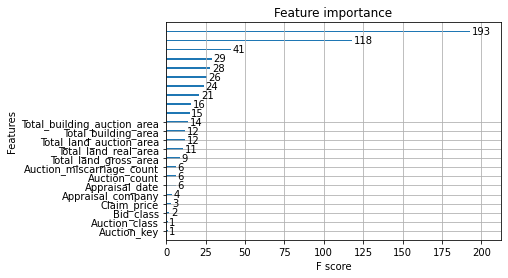

In [ ]:
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.yticks(range(13), col_names)
plt.show()

In [ ]:
y_pred = xgb.predict(val_x)
y_true = val_y

mae = mean_absolute_error(y_true, y_pred)
mae

mse = mean_squared_error(y_true, y_pred)
mse 
RMSE = mse**0.5
RMSE

443452618.38668364

In [ ]:
key = test_x.Auction_key
test_x = test_x.drop(['Auction_key'],axis = 1)


In [ ]:
y_pred = xgb.predict(test_x)
y_pred = y_pred.astype(int)
y_pred

array([ 140236320,  134898704,  140236320,  140236320,  140236320,
        140236320,  134898704,  190362672,  191588320,  296207424,
        168395536,   70838200,   93114768,   73200248,  426950112,
         64768952,  444136352,  129267744,  140436080,  171236912,
         46876404,  548990848,  175443136,  175443136,  154660992,
        285430848,  133105336,  300622208,  155853440,  231183392,
        103098424,   93978680,  335852736,  117850640,  139349136,
        173958416,  236393264,  178557136,  176523712,  478193984,
         80847680,  354724384,  342081632,  175176144,  278596320,
        171435152,  117676440,  598439104,  164744592,   99237472,
         31384484,  193185680,  318320736,  110672352,   93220184,
        131389056,   94611680,  232905440,  347313184,   92836528,
        103418608,  295956832,  419725760,  178121072,  158443744,
        484833088,  499324192,  152288736,  309596800,  110672352,
        272994720,  397669056,  257310624,  171164896,  286207

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/[3]apartment/data_kr/Auction_submission.csv')
submission

,Auction_key,Hammer_price
0,1778,0
1,1779,0
2,1784,0
3,1786,0
4,1790,0
...,...,...
824,1762,0
825,1767,0
826,1770,0
827,1772,0


In [ ]:
submission['Hammer_price'] = y_pred

In [ ]:
submission

,Auction_key,Hammer_price
0,1778,140236320
1,1779,134898704
2,1784,140236320
3,1786,140236320
4,1790,140236320
...,...,...
824,1762,439640512
825,1767,554746944
826,1770,279084032
827,1772,510447936


In [ ]:
train.Hammer_price

0        760000000
1        971889999
2         93399999
3        256899000
4        158660000
           ...    
1928     402500000
1929     430234600
1930    1118999990
1931     403000000
1932     686010000
Name: Hammer_price, Length: 1933, dtype: int64

In [ ]:
submission.to_csv('submission.csv',index=False)